# Logistic Regression without Regularization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [2]:
def generate_dataset(size, n_features):
    a1, a2 = make_classification(n_samples=size, n_features=n_features, n_classes=2, n_informative=n_features, n_redundant=0)
    a2 = a2.reshape(-1,1)
    a1 = np.hstack((np.ones((a1.shape[0],1)), a1)) # adding bias column to dataset
    print('dataset shape x: {} y: {}'.format(a1.shape, a2.shape))
    return a1, a2

In [3]:
def hypothesis(weights, x):
    # x: m x n
    # weights: n x 1
    h = np.power(1 + np.exp(np.negative(np.dot(x, weights))), -1)
    return h # m x 1

In [4]:
def cost(weights, x, y):
    # x: m x n
    # y: m x 1
    m = y.shape[0]
    h = hypothesis(weights, x) # m x 1
    j = -(np.dot(np.transpose(y), np.log(h)) + np.dot(np.transpose(1 - y), np.log(1 - h)))/m
    #print('cost : {}'.format(j))
    return j

In [5]:
def update_weights(w, x, y, k):
    # x: m x n
    # y: m x 1
    # weights: n x 1
    weights = w[:, :]
    weights = weights - k * (np.dot(np.transpose(x), hypothesis(weights, x) - y))
    #print('updated weights {}'.format(weights))
    return weights

In [6]:
def gradient_descent(xtrain, ytrain, xval, yval, lr, w, batch_size, threshold_diff):
    from IPython.display import display, clear_output
    import time
    k = lr/batch_size
    weights = w[:, :]
    total_sample = xtrain.shape[0]
    j_prev = np.array([[100000000]])
    i = 0
    epoch = 0
    training_cost = []
    validation_cost = []
    while True:
        for i in range(0 ,total_sample, batch_size):
            x_data = xtrain[i:i+batch_size, :]
            y_data = ytrain[i:i+batch_size, :]
            weights = update_weights(weights, x_data, y_data, k)
        j = cost(weights, xtrain, ytrain)
        j_val = cost(weights, xval, yval)
#         display('Epochs '+str(epochs) + '-----j : {}'.format(j) + '-----j_prev : {}'.format(j_prev))
        print('Epoch {}'.format(epoch) + '  -----    j : {}'.format(j.item()) + '    -----   j_prev : {}'.format(j_prev.item()))
#         time.sleep(0.1)
#         clear_output(wait=True)
        epoch += 1
        training_cost.append(j.item())
        validation_cost.append(j_val.item())
        if (j_prev - j) < threshold_diff:
            break
        j_prev = j
    return weights, training_cost, validation_cost, range(1, epoch + 1)

In [7]:
def predict(weights, xinput):
    y = hypothesis(weights, xinput)
    output = np.where(y >= 0.5, 1, 0)
    return output

In [8]:
def accuracy_score(ytest, pred):
    return np.sum(ytest == pred)/ytest.shape[0], np.sum(np.abs(pred_val-ytest))

In [99]:
n_features = 500
learning_rate = 0.01
threshold_diff = 0.0001
n_examples = 10000
batch_size = 10000
# when there are more parameters then model can be complex and training data overfits and validation underfits
initial_weights = np.array([0]*(n_features+1)).reshape(-1, 1)
xtrain, ytrain = generate_dataset(n_examples, n_features)
xtrain, xtest, ytrain, ytest = train_test_split(xtrain, ytrain, test_size=0.8)
xval, xtest, yval, ytest = train_test_split(xtest, ytest, test_size=0.2)

dataset shape x: (10000, 501) y: (10000, 1)


In [100]:
weights, training_cost, validation_cost, epochs = gradient_descent(xtrain, ytrain, xval, yval, learning_rate, initial_weights,\
                                                                 batch_size, threshold_diff)

Epoch 0  -----    j : 0.624792915772874    -----   j_prev : 100000000
Epoch 1  -----    j : 0.576088678940491    -----   j_prev : 0.624792915772874
Epoch 2  -----    j : 0.5401054796302189    -----   j_prev : 0.576088678940491
Epoch 3  -----    j : 0.512508702026108    -----   j_prev : 0.5401054796302189
Epoch 4  -----    j : 0.4906366266575825    -----   j_prev : 0.512508702026108
Epoch 5  -----    j : 0.4728198811369101    -----   j_prev : 0.4906366266575825
Epoch 6  -----    j : 0.4579755136582195    -----   j_prev : 0.4728198811369101
Epoch 7  -----    j : 0.44537568839787456    -----   j_prev : 0.4579755136582195
Epoch 8  -----    j : 0.43451478606973437    -----   j_prev : 0.44537568839787456
Epoch 9  -----    j : 0.4250309871862408    -----   j_prev : 0.43451478606973437
Epoch 10  -----    j : 0.41665851053668557    -----   j_prev : 0.4250309871862408
Epoch 11  -----    j : 0.40919758254572913    -----   j_prev : 0.41665851053668557
Epoch 12  -----    j : 0.4024949805914723    -

Epoch 119  -----    j : 0.28041565131150653    -----   j_prev : 0.28066737156241633
Epoch 120  -----    j : 0.2801673309806323    -----   j_prev : 0.28041565131150653
Epoch 121  -----    j : 0.279922340963014    -----   j_prev : 0.2801673309806323
Epoch 122  -----    j : 0.27968061359548835    -----   j_prev : 0.279922340963014
Epoch 123  -----    j : 0.2794420830895684    -----   j_prev : 0.27968061359548835
Epoch 124  -----    j : 0.27920668546546956    -----   j_prev : 0.2794420830895684
Epoch 125  -----    j : 0.2789743584889539    -----   j_prev : 0.27920668546546956
Epoch 126  -----    j : 0.2787450416108502    -----   j_prev : 0.2789743584889539
Epoch 127  -----    j : 0.2785186759091159    -----   j_prev : 0.2787450416108502
Epoch 128  -----    j : 0.27829520403331603    -----   j_prev : 0.2785186759091159
Epoch 129  -----    j : 0.278074570151401    -----   j_prev : 0.27829520403331603
Epoch 130  -----    j : 0.27785671989866956    -----   j_prev : 0.278074570151401
Epoch 131 

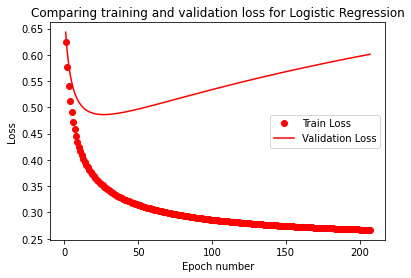

In [101]:
plt.plot(epochs, training_cost, 'ro', label='Train Loss')
plt.plot(epochs, validation_cost, 'r', label='Validation Loss')
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.title('Comparing training and validation loss for Logistic Regression')
plt.legend()
plt.show()

In [102]:
pred_val = predict(weights, xtest)

In [103]:
print(np.hstack((hypothesis(weights, xtest), pred_val, ytest)))

[[0.11653384 0.         0.        ]
 [0.0034044  0.         0.        ]
 [0.20912549 0.         0.        ]
 ...
 [0.03579811 0.         0.        ]
 [0.62080326 1.         1.        ]
 [0.98607708 1.         0.        ]]


In [104]:
accuracy, wrong_counts = accuracy_score(ytest, pred_val)
print(accuracy)
print(wrong_counts)
print(pred_val.shape)

0.755625
391
(1600, 1)


In [105]:
from sklearn import metrics
print(metrics.accuracy_score(ytest, pred_val))

0.755625


# Note : With Regularization
- as we can see through the graph that model fits on train data, but on validation, loss start to increase after minima
- so this is the condition of overfitting
- now we will use regularization to overcome this problem


In [106]:
def reg_cost(weights, x, y, lamda):
    # x: m x n
    # y: m x 1
    m = y.shape[0]
    h = hypothesis(weights, x) # m x 1
    j = -(np.dot(np.transpose(y), np.log(h)) + np.dot(np.transpose(1 - y), np.log(1 - h)))
    j = j + (lamda/2)*(np.sum(np.square(weights[1:, :]))) # regularization term
    j /= m
    #print('cost : {}'.format(j))
    return j

In [107]:
def reg_update_weights(weights, x, y, k, lamda):
    # x: m x n
    # y: m x 1
    # weights: n x 1
    weights0, weights_i = weights[0:1, :], weights[1:, :]
    x0, x_i = x[:, 0:1], x[:, 1:]
    weights0 = weights0 - k * (np.dot(np.transpose(x0), hypothesis(weights0, x0) - y))
    weights_i = weights_i*(1-k*lamda) - k * (np.dot(np.transpose(x_i), hypothesis(weights_i, x_i) - y)) #regularization added
    #print('updated weights {}'.format(weights))
    return np.vstack((weights0, weights_i))

In [108]:
def reg_gradient_descent(xtrain, ytrain, xval, yval, lr, weights, batch_size, threshold_diff, lamda):
    from IPython.display import display, clear_output
    import time
    k = lr/batch_size
    total_sample = xtrain.shape[0]
    j_prev = np.array([[100000000]])
    i = 0
    epoch = 0
    training_cost = []
    validation_cost = []
    while True:
        for i in range(0 ,total_sample, batch_size):
            x_data = xtrain[i:i+batch_size, :]
            y_data = ytrain[i:i+batch_size, :]
            weights = reg_update_weights(weights, x_data, y_data, k, lamda)
        j = reg_cost(weights, xtrain, ytrain, lamda)
        j_val = reg_cost(weights, xval, yval, lamda)
        print('Epoch {}'.format(epoch) + '  -----    j : {}'.format(j.item()) + '   -----   j_prev : {}'.format(j_prev.item()))
        epoch += 1
        training_cost.append(j.item())
        validation_cost.append(j_val.item())
        if (j_prev - j) < threshold_diff:
            break
        j_prev = j
    return weights, training_cost, validation_cost, range(1, epoch + 1)

In [109]:
lamda = 10000
threshold_diff = 0.0001
weights, training_cost, validation_cost, epochs = reg_gradient_descent(xtrain, ytrain, xval, yval, learning_rate, initial_weights,\
                                                                 batch_size, threshold_diff, lamda)

Epoch 0  -----    j : 0.6251647629523174   -----   j_prev : 100000000
Epoch 1  -----    j : 0.5778650890567615   -----   j_prev : 0.6251647629523174
Epoch 2  -----    j : 0.5437285483324907   -----   j_prev : 0.5778650890567615
Epoch 3  -----    j : 0.518152465809885   -----   j_prev : 0.5437285483324907
Epoch 4  -----    j : 0.49835331914139225   -----   j_prev : 0.518152465809885
Epoch 5  -----    j : 0.48260460266580035   -----   j_prev : 0.49835331914139225
Epoch 6  -----    j : 0.46979587146095536   -----   j_prev : 0.48260460266580035
Epoch 7  -----    j : 0.45918607896871344   -----   j_prev : 0.46979587146095536
Epoch 8  -----    j : 0.4502636029145207   -----   j_prev : 0.45918607896871344
Epoch 9  -----    j : 0.44266439173768185   -----   j_prev : 0.4502636029145207
Epoch 10  -----    j : 0.43612245095109087   -----   j_prev : 0.44266439173768185
Epoch 11  -----    j : 0.4304388820723112   -----   j_prev : 0.43612245095109087
Epoch 12  -----    j : 0.4254619153514787   -----

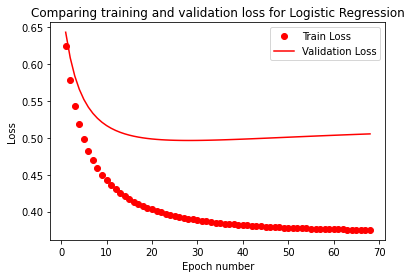

In [110]:
plt.plot(epochs, training_cost, 'ro', label='Train Loss')
plt.plot(epochs, validation_cost, 'r', label='Validation Loss')
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.title('Comparing training and validation loss for Logistic Regression')
plt.legend()
plt.show()

In [111]:
pred_val = predict(weights, xtest)

In [112]:
print(np.hstack((hypothesis(weights, xtest), pred_val, ytest)))

[[0.35744897 0.         0.        ]
 [0.06060247 0.         0.        ]
 [0.19247981 0.         0.        ]
 ...
 [0.10364493 0.         0.        ]
 [0.49246689 0.         1.        ]
 [0.9569912  1.         0.        ]]


In [113]:
accuracy, wrong_counts = accuracy_score(ytest, pred_val)
print(accuracy)
print(wrong_counts)
print(pred_val.shape)

0.765
376
(1600, 1)


## Hence we can see the difference in the results of 2 models !!!